In [15]:
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Global Parameters
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
def load_dataset(filename, cols):
    dataset = pd.read_csv(filename)
    dataset.columns = cols
    return dataset

def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

0        RT I giving away R5K 100 lucky winners TODAY T...
1        xf0x9fx91x87This really important issue Even p...
2        RT I giving away R5K 100 lucky winners TODAY T...
3        RT I giving away R5K 100 lucky winners TODAY T...
4        Romesh Sabharwal ji Ganja fuk lia hai kya Isse...
                               ...                        
47376    Friend Request xe2x9dx8cnAcid request xe2x9cx9...
47377                                 RT pretty nice shoes
47378    RT 8nn18 year old Basit Bilal Khan resident Pu...
47379    RT Yogi Adityanath asks chief secretary write ...
47380    hate talking people department im invested hel...
Name: tweet, Length: 47381, dtype: object


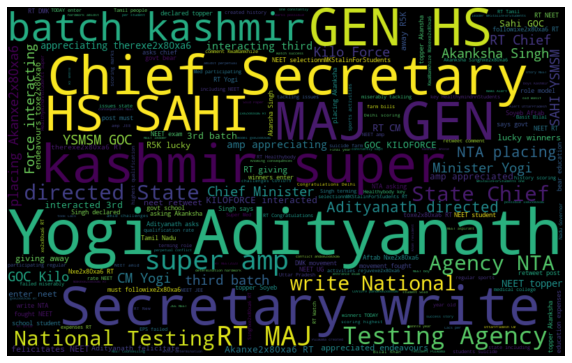

In [21]:
df = load_dataset('/content/drive/MyDrive/neet_data.csv',['created_at','retweet_count', 'source', 'user_id','user_name','user_description','user_follower_count','user_friends_count','user_loaction','user_verified','user_url','tweet','length_of_tweet'])
# Remove unwanted columns from dataset
n_df = remove_unwanted_cols(df, ['created_at','retweet_count', 'source', 'user_id','user_name','user_description','user_follower_count','user_friends_count','user_loaction','user_verified','user_url','length_of_tweet'])
#Preprocess data
df.tweet = df['tweet'].apply(preprocess_tweet_text)
print(df.tweet)
all_words = ' '.join([text for text in df['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()